In [1]:
library(tidyverse)
library(glue)

Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

In [31]:
library(tidyverse)
library(glue)
library(dplyr)

install.packages("showtext")
install.packages("extrafont")
library(extrafont)
font_import()


theme_rangeframe <- function(size = 0.3) {
    theme(
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )
}

scale_axis_rangeframe <- function() {
    guides(x = "axis_truncated", y = "axis_truncated")
}

rotate_x_text <- function(angle=45) {
    theme(
        axis.text.x = element_text(angle = angle, hjust = 1)
    )
}

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

no_legend <- function() {
    theme(
        legend.position = "none"
    )
}

no_margin <- function() {
    theme(
        plot.margin = margin(0, 0, 0, 0, unit = "lines")
    )
}

no_label <- function() {
    theme(
        axis.title = element_blank()
    )
}

no_text <- function() {
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()
    )
}

no_x_text <- function() {
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
}

no_y_text <- function() {
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )
}


custom_theme <- function(size = 0.3){
    theme_minimal() +
    theme(
        text = element_text(family='Helvetica'),
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )

}
theme_set(custom_theme())

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}


also installing the dependencies ‘sysfonts’, ‘showtextdb’


Warning message in install.packages("showtext"):
“installation of package ‘sysfonts’ had non-zero exit status”
Warning message in install.packages("showtext"):
“installation of package ‘showtextdb’ had non-zero exit status”
Warning message in install.packages("showtext"):
“installation of package ‘showtext’ had non-zero exit status”
Registering fonts with R



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf
 : DejaVuSans-BoldOblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-ExtraLight.ttf
 : DejaVuSans-ExtraLight already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf
 : DejaVuSans-Oblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf
 : DejaVuSansCondensed-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf
 : DejaVuSansCondensed-BoldOblique already registered in fonts d

In [2]:
color_dict = c(
    "CellFlow"= "#B12F8C",
    "Mean model 1"= "#d8dfa5",
    "Mean model 2"= "#88afd7",
    "Identity"="#E1C8AC",
    "min"="#475a69")

In [3]:
output_dir <- glue("/lustre/groups/ml01/workspace/ot_perturbation/figures/zebrafish/benchmark/full_gene")
dir.create(output_dir)

Warning message in dir.create(output_dir):
“'/lustre/groups/ml01/workspace/ot_perturbation/figures/zebrafish/benchmark/full_gene' already exists”


In [4]:
results <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/results/allocation/results_full_gene_mmd_per_condition.csv")

New names:
• `` -> `...1`
Rows: 71 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene_target, Unnamed: 0
dbl (4): ...1, timepoint, value, improvement

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
results$timepoint <- as.character(results$timepoint)

#results$mode <- c("zero", "zero", "zero", "one", "zero", "", )

ERROR: Error in c("zero", "zero", "zero", "one", "zero", "", ): argument 7 is empty


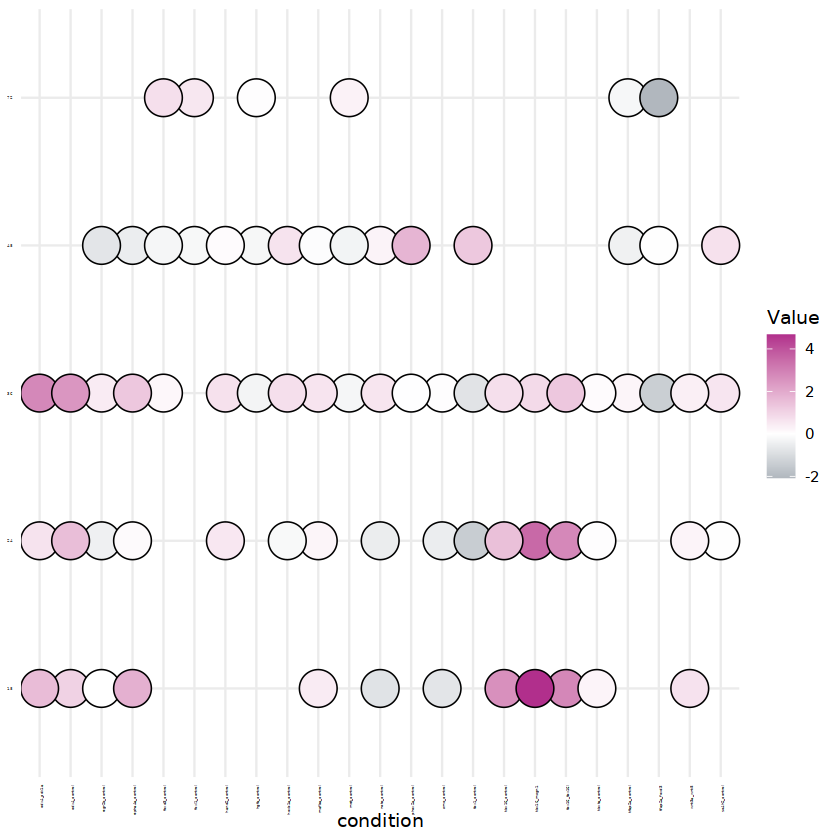

In [20]:
library(ggplot2)

# Example ggplot with borders
ggplot(results, aes(
  x = gene_target,
  y = timepoint,
  fill = improvement
)) +
  geom_point(
    shape = 21,        # Shape 21 allows both border and fill
    color = "black",   # Border color
    size = 10,         # Size of the points
    stroke = 0.5       # Thickness of the border
  ) +
  scale_fill_gradient2(
    low = "#566573",
    mid = "white",
    high = "#B12F8C",
    name = "Value"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 2),
    axis.text.y = element_text(size = 2),
    legend.position = "right"
  ) +
  labs(
    title = NULL,
    x = "condition",
    y = NULL
  )


In [66]:
results <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/results/allocation/results_full_gene_e_distance_per_condition.csv")

New names:
• `` -> `...1`
Rows: 71 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene_target, Unnamed: 0
dbl (5): ...1, timepoint, value, improvement, group

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [91]:
desired_order <- c('hand2_control',
 'tbx1_control',
 'smo_control',
 'noto_control',
 'tbxta_control',
 'wnt3a_wnt8',
 'met_control',
 'foxi1_control',
 'hgfa_control',
 'phox2a_control',
 'zc4h2_control',
 'egr2b_control',
 'epha4a_control',
 'hoxb1a_control',
 'mafba_control',
 'tbx16_tbx16l',
 'tbx16_control',
 'tbx16_msgn1',
 'cdx4_cdx1a',
 'cdx4_control',
 'tfap2a_control',
 'foxd3_control',
 'tfap2a_foxd3')
results$gene_target <- factor(results_tmp$gene_target, levels = desired_order)

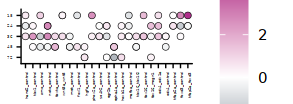

In [92]:
library(ggplot2)
options(repr.plot.width=6.2/2.54, repr.plot.height=2.2/2.54)

# Ensure timepoint is treated as a factor with the correct order
results$timepoint <- factor(results$timepoint, levels=c(72, 48, 36, 24, 18))

# Example ggplot with borders
p <- ggplot(results, aes(
  x = gene_target,
  y = timepoint,
  fill = improvement
)) +
  geom_point(
    shape = 21,        # Shape 21 allows both border and fill
    color = "black",   # Border color
    size = 1.5,        # Size of the points
    stroke = 0.2       # Thickness of the border
  ) +
  scale_fill_gradient2(
    low = "#566573",
    mid = "white",
    high = "#B12F8C",
    name = "Value"
  ) +
  custom_theme() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 2),
    axis.text.y = element_text(size = 2),
    legend.position = "right",
    panel.grid.major = element_blank(),   # Remove major grid lines
    panel.grid.minor = element_blank(),   # Remove minor grid lines
    panel.background = element_blank()    # Remove background color
  ) +
  labs(
    title = NULL,
    x = NULL,
    y = NULL
  )

p


In [93]:
ggsave(file.path(output_dir, "e_distance_per_condition.pdf"), plot = p, device = "pdf", width = 6.2, height = 2.2, unit="cm")

In [59]:
results <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/results/allocation/results_full_gene_cell_type_fraction_error_per_condition.csv")

New names:
• `` -> `...1`
Rows: 71 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene_target, Unnamed: 0
dbl (4): ...1, timepoint, value, improvement

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [60]:
results$timepoint <- as.character(results$timepoint)

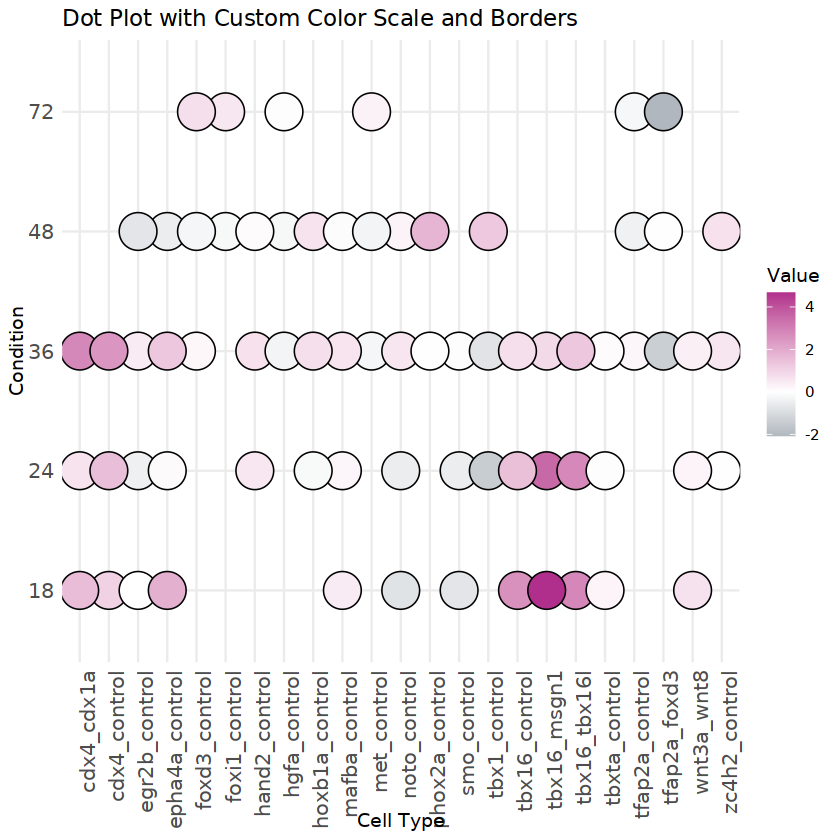

In [12]:
library(ggplot2)

# Example ggplot with borders
ggplot(results, aes(
  x = gene_target,
  y = timepoint,
  fill = improvement
)) +
  geom_point(
    shape = 21,        # Shape 21 allows both border and fill
    color = "black",   # Border color
    size = 10,         # Size of the points
    stroke = 0.5       # Thickness of the border
  ) +
  scale_fill_gradient2(
    low = "#566573",
    mid = "white",
    high = "#B12F8C",
    name = "Value"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 2),
    axis.text.y = element_text(size = 2),
    legend.position = "right"
  ) +
  labs(
    title = "Dot Plot with Custom Color Scale and Borders",
    x = "Cell Type",
    y = "Condition"
  )


In [ ]:
none_seen <- c('zc4h2_control', 'met_control', 'hgfa_control', )
seen_in_other_condition <- c('tfap2a_control' , )

In [ ]:
'tfap2a_foxd3''noto_control''cdx4_cdx1a''epha4a_control''mafba_control''tbx16_msgn1''noto_control''smo_control''hand2_control''noto_control''egr2b_control''cdx4_control''tfap2a_control''foxi1_control''egr2b_control''cdx4_control''zc4h2_control''hoxb1a_control''tfap2a_foxd3''tbx16_tbx16l''smo_control''mafba_control''hgfa_control''tbx16_control''mafba_control''tbx1_control''zc4h2_control''wnt3a_wnt8''foxi1_control''smo_control''noto_control''mafba_control''tfap2a_control''hand2_control''egr2b_control''phox2a_control''tbx1_control''tbx16_msgn1''foxd3_control''wnt3a_wnt8''egr2b_control''wnt3a_wnt8''met_control''phox2a_control''epha4a_control''foxd3_control''tfap2a_foxd3''hand2_control''cdx4_cdx1a''hgfa_control''tbx16_tbx16l''tbxta_control''cdx4_control''foxd3_control''met_control''tbx1_control''epha4a_control''cdx4_cdx1a''tbx16_control''tbx16_tbx16l''tbx16_control''tbxta_control''tbx16_msgn1''epha4a_control''tbxta_control''hoxb1a_control''hoxb1a_control'


In [83]:
results

...1,timepoint,gene_target,Unnamed: 0,value,improvement,group
<dbl>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
0,24,zc4h2_control,ood_e_distance,5.627183,-0.01950295,0
1,36,met_control,ood_e_distance,27.738879,-0.26352534,0
2,72,tfap2a_control,ood_e_distance,41.368976,-0.22982294,1
3,48,hgfa_control,ood_e_distance,36.611944,-0.23633812,0
4,72,tfap2a_foxd3,ood_e_distance,39.820779,-2.07849744,2
5,18,noto_control,ood_e_distance,11.766761,-0.79818574,0
6,36,cdx4_cdx1a,ood_e_distance,3.913161,2.82050142,1
7,48,epha4a_control,ood_e_distance,8.579053,-0.51588225,0
8,36,mafba_control,ood_e_distance,11.685782,0.63071330,0
